# 랜덤 포레스트

In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [13]:
iris = datasets.load_iris()
print("아이리스 종류:", iris.target_names)
print("target [0: setosa, 1: versicolor, 2: virginica]")
print("데이터의 수:", len(iris.data))
print("데이터 열 이름:", iris.feature_names)


아이리스 종류: ['setosa' 'versicolor' 'virginica']
target [0: setosa, 1: versicolor, 2: virginica]
데이터의 수: 150
데이터 열 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
data = pd.DataFrame(
    {
        'sepal length': iris.data[:, 0],
        'sepal width': iris.data[:, 1],
        'petal length': iris.data[:, 2],
        'petal width': iris.data[:, 3],
        'species': iris.target
    }
)

print(data.head())


   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [19]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']


In [20]:
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =42)

In [22]:
forest = RandomForestClassifier(n_estimators= 100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]


In [25]:
print("정확도: ", metrics.accuracy_score(y_test, y_pred))

정확도:  1.0


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



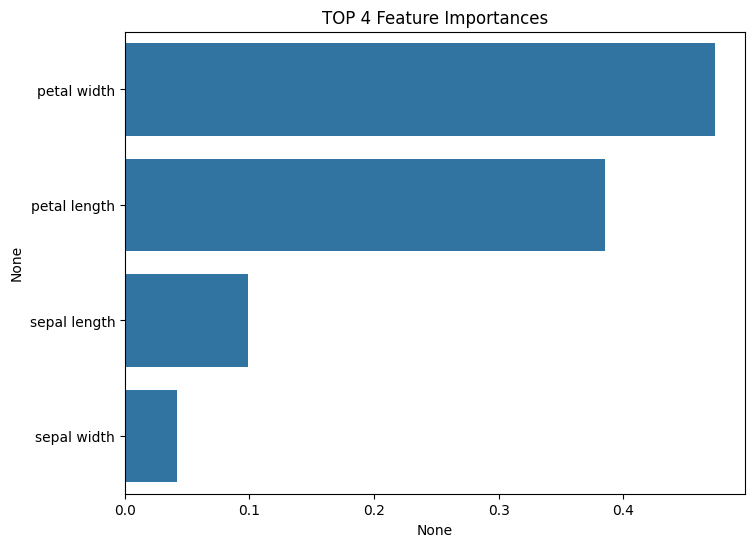

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 특성 중요도 가져오기
feature_importance_values = forest.feature_importances_
feature_importance = pd.Series(feature_importance_values, index=X_train.columns)
feature_top4 = feature_importance.sort_values(ascending=False)[:4]

# 시각화
plt.figure(figsize=(8, 6))
plt.title("TOP 4 Feature Importances")
sns.barplot(x=feature_top4, y=feature_top4.index)
plt.show()


# 랜덤포레스트 회귀모델

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plot

In [34]:
data = load_wine()
data.target[[10,80,140]]
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [40]:
X = df.iloc[:, 1:]    
Y = df.iloc[:, 0]       
wineNames = np.array(data.feature_names[1:])  

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

x_train.shape, x_test.shape


((124, 12), (54, 12))

In [42]:
model = ensemble.RandomForestRegressor(n_estimators= 150, max_depth = 4, random_state= 42)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=150, random_state=42)

In [44]:
pred = model.predict(x_test)
print(mean_squared_error(y_test, pred))

0.18888344525079934


In [46]:
model.score(x_test, y_test)

0.6481484034041597

In [47]:
featureImportance =model.feature_importances_
feature_importance

sepal length    0.098849
sepal width     0.041768
petal length    0.385401
petal width     0.473983
dtype: float64

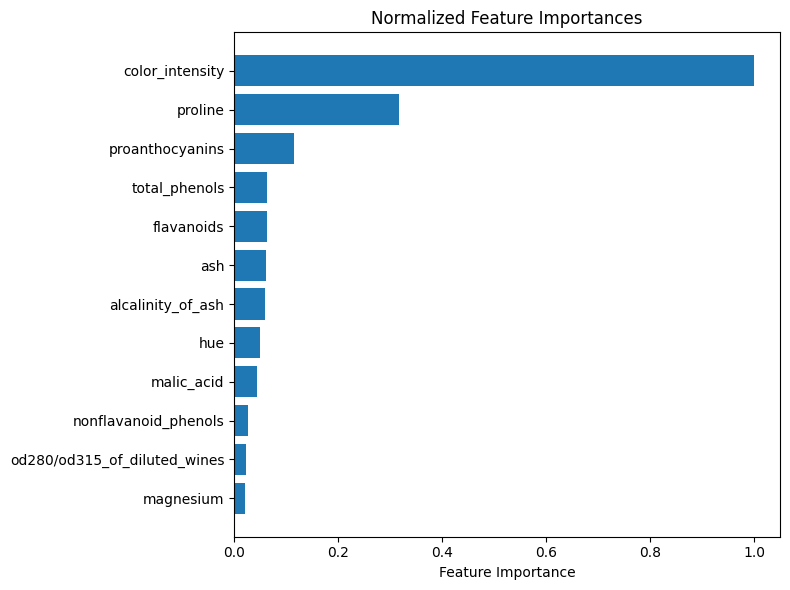

In [49]:
#중요한 피쳐들을 보는 방법
featureImportance = featureImportance / featureImportance.max()

sorted_idx = np.argsort(featureImportance)

barPos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(8, 6))
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, wineNames[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Normalized Feature Importances")
plt.tight_layout()
plt.show()


In [54]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import pandas as pd
from sklearn.datasets import load_iris
import scikitplot as skplt

In [55]:
# 데이터 로드
dataset = load_iris()
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    iris, dataset.target, random_state=42
)

In [56]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [57]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
fscore = model.get_booster().get_fscore()
fscore

{'sepal length (cm)': 108.0,
 'sepal width (cm)': 101.0,
 'petal length (cm)': 135.0,
 'petal width (cm)': 127.0}

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

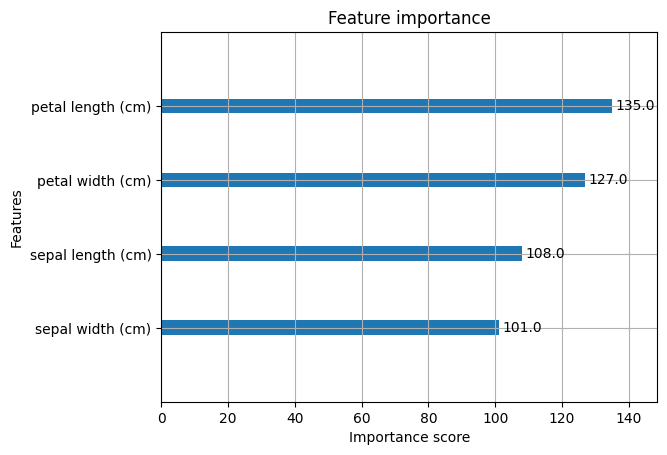

In [59]:
plot_importance(model) #중요도 높은 피쳐 그래프

In [60]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [61]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

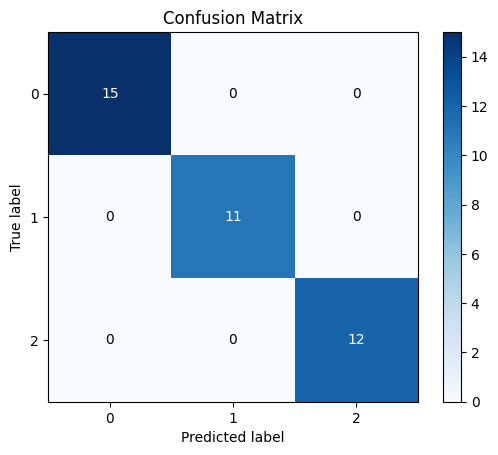

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### XGBoost 회귀

In [65]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [89]:
housing = fetch_california_housing()
x = housing.data
y = housing.target
col_names = housing.feature_names

In [90]:
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [91]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [92]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [93]:
import numpy as np
y.mean()
y = np.log(y)
y.mean()
y[:10]

array([1.50983855, 1.27675847, 1.25874504, 1.22759167, 1.23022518,
       0.99214004, 1.09594206, 0.88128512, 0.81845737, 0.95973329])

In [94]:
y.mean()

0.5719587205516943

In [95]:
X_df = pd.DataFrame(X, columns = col_names)
X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_df,y, random_state= 42)

In [97]:
model = XGBRegressor(n_estimators = 400)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [98]:
model.score(x_test,y_test)

0.8451349072492976

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

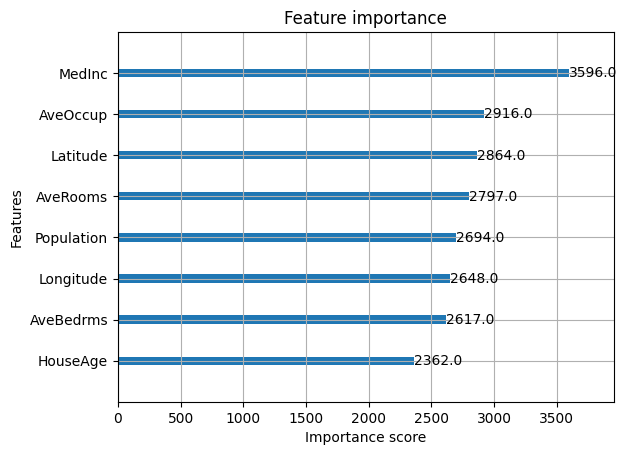

In [100]:
plot_importance(model)

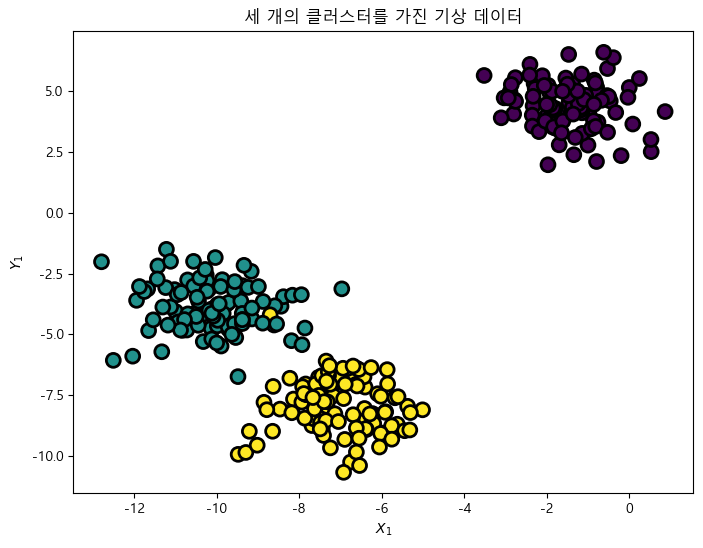

In [103]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 한글 및 마이너스 깨짐 방지 설정
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "Malgun Gothic"

# 데이터 생성
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)

# 그래프 출력
plt.figure(figsize=(8, 6))
plt.title("세 개의 클러스터를 가진 기상 데이터")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolors='k', linewidths=2)
plt.xlabel("$X_1$")
plt.ylabel("$Y_1$")
plt.show()


In [108]:
X, y = make_blobs(n_samples=50, n_features=2, centers=3, cluster_std = 0.5,  random_state=1)
print(X)
print(y)

[[ -9.93763303  -3.64474699]
 [ -7.17604625  -8.25360714]
 [ -7.00397155  -7.58848615]
 [ -7.25252466  -8.47259331]
 [ -6.85313501  -8.11455807]
 [ -1.22685609   3.25572052]
 [ -2.20986949   4.97885172]
 [ -9.97230863  -4.27184637]
 [ -1.09267518   3.85654424]
 [ -1.82076851   4.21446269]
 [ -6.46542324  -8.0606499 ]
 [ -6.94983482  -7.77222251]
 [ -6.90706471  -9.16432871]
 [-10.37491147  -3.32691447]
 [ -7.78693909  -8.40546104]
 [ -1.99518297   4.40015757]
 [ -0.92850594   3.37641951]
 [ -0.78715402   4.02588642]
 [-10.10215962  -3.66003695]
 [ -9.5782208   -3.48779751]
 [ -1.50004036   4.28180468]
 [ -1.74577401   3.96756066]
 [ -9.90225476  -2.90322098]
 [ -1.20913193   4.06462594]
 [-10.5689716   -4.12801991]
 [ -8.9049248   -4.65159672]
 [ -2.00539028   4.20811311]
 [ -6.97160149  -7.94820228]
 [ -1.72100502   3.93860515]
 [ -7.21798419  -7.73924078]
 [ -7.40021333  -7.96444621]
 [-10.55636768  -3.8361407 ]
 [ -9.84762734  -4.12947347]
 [-10.09363028  -4.39716303]
 [ -1.92364578

In [109]:
y = 2*y-1 #y값 조정 기준?
y

array([ 1,  3,  3,  3,  3, -1, -1,  1, -1, -1,  3,  3,  3,  1,  3, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  3, -1,  3,  3,  1,  1,  1,
       -1, -1, -1,  1,  3,  3,  3, -1, -1,  1,  3,  1,  1,  1,  1,  3])

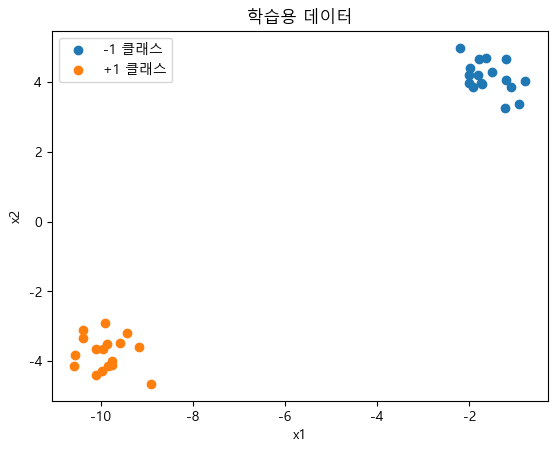

In [111]:
plt.rcParams['font.family'] = 'Malgun Gothic'


plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label='-1 클래스')

plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='+1 클래스')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()


In [113]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1e10).fit(X,y)

### SVC 속성
    # n_support_ : 각 클래스의 서포트 벡터의 개수
    # support_: 각 클래스의 서포트 백터의 인덱스 개수
    # support_vectors_ : 각 클래스의 서포트의 X 값
    # coef_ : 기울기
    # intercept_ : 절편
    # dual_coef_: 각 원소가 ai yi로 이루어진 벡터, 음의 계수와 양의 계수를 나타냅니다.

In [116]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1e10).fit(X,y)

In [117]:
model.n_support_

array([2, 2, 2])

In [118]:
model.support_

array([ 5, 34, 25, 48,  2, 39])

In [120]:
X

array([[ -9.93763303,  -3.64474699],
       [ -7.17604625,  -8.25360714],
       [ -7.00397155,  -7.58848615],
       [ -7.25252466,  -8.47259331],
       [ -6.85313501,  -8.11455807],
       [ -1.22685609,   3.25572052],
       [ -2.20986949,   4.97885172],
       [ -9.97230863,  -4.27184637],
       [ -1.09267518,   3.85654424],
       [ -1.82076851,   4.21446269],
       [ -6.46542324,  -8.0606499 ],
       [ -6.94983482,  -7.77222251],
       [ -6.90706471,  -9.16432871],
       [-10.37491147,  -3.32691447],
       [ -7.78693909,  -8.40546104],
       [ -1.99518297,   4.40015757],
       [ -0.92850594,   3.37641951],
       [ -0.78715402,   4.02588642],
       [-10.10215962,  -3.66003695],
       [ -9.5782208 ,  -3.48779751],
       [ -1.50004036,   4.28180468],
       [ -1.74577401,   3.96756066],
       [ -9.90225476,  -2.90322098],
       [ -1.20913193,   4.06462594],
       [-10.5689716 ,  -4.12801991],
       [ -8.9049248 ,  -4.65159672],
       [ -2.00539028,   4.20811311],
 

In [121]:
model.support_vectors_

array([[-1.22685609,  3.25572052],
       [-1.92364578,  3.87000556],
       [-8.9049248 , -4.65159672],
       [-9.43189781, -3.19344014],
       [-7.00397155, -7.58848615],
       [-7.28844647, -7.54097425]])

In [122]:
model.coef_

array([[ 0.14131038,  0.13293882],
       [ 0.07653234,  0.14365863],
       [-0.29493718,  0.52718607]])

In [123]:
model.intercept_

array([0.75735712, 0.62618182, 0.82586359])

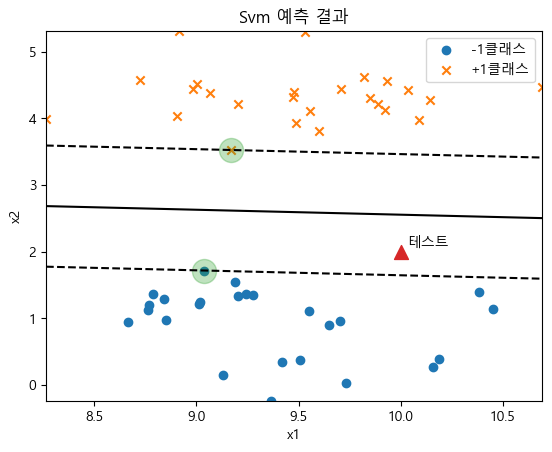

In [161]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1  


model = SVC(kernel='linear', C=1e10).fit(X, y)


xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)


Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]]) #음수면 -1 양수면 +1로 처리하는 함수
    Z[i, j] = p[0]


levels = [-1, 0, 1]
lineStyle = ['dashed', 'solid', 'dashed']


plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1클래스")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label="+1클래스")
plt.contour(X1, X2, Z, levels=levels, colors='k', linestyles=lineStyle)  # ✅ linestyles


plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)


x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, '테스트')


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Svm 예측 결과")
plt.show()


In [145]:
x_new = [10, 2]
model.decision_function([x_new])

array([[ 2.26816758, -0.25934927,  0.87374634]])

In [146]:
model.coef_.dot(x_new) + model.intercept_

array([ 2.43633852,  1.67882245, -1.06913607])

In [150]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [152]:
iris = load_iris()
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
X_data.shape

(100, 2)

In [153]:
y = iris.target[(iris.target == 0) | (iris.target == 1)]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size= 0.2 ,random_state=42)
svm = SVC(kernel='linear', C = 1e10)
svm.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [156]:
pred_y =svm.predict(X_test)
confusion_matrix(y_test, pred_y)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [157]:
svm.score(X_test, y_test)

1.0

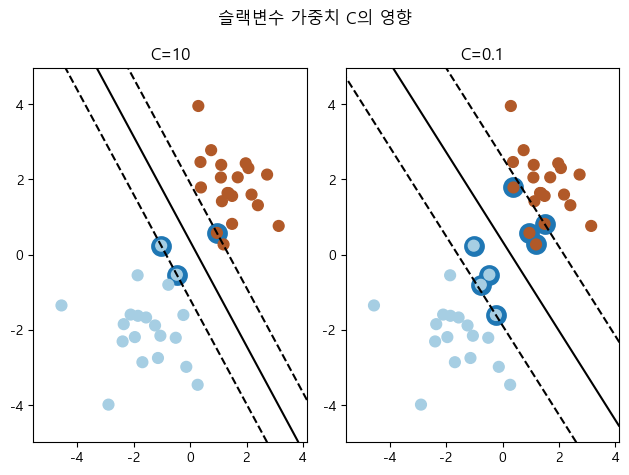

In [164]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2,2], np.random.randn(20,2) + [2,2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel = 'linear', C = penalty).fit(X,Y)
    xx = np.linspace(-5,5)

    x_jin = X[:, 0].min() - 1
    x_jax = X[:, 0].max() + 1
    y_jin = X[:, 1].min() - 1
    y_jax = X[:, 1].max() + 1
    
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    XX, YY = np.mgrid[x_jin: x_jax:200j, y_jin: y_jax: 200j]

    levels = [-1,0,1]
    linestyles = ['dashed' , 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.subplot(1,2,plotnum)
    plt.contour(XX, YY, Z , levels ,colors = 'k', linestyles = linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 120 , linewidth = 4)
    plt.scatter(X[:, 0], X[:,1], c = Y, s = 60, linewidth = 1, cmap = plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)

    plt.title(name)

    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

### 이미지 분류

In [167]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\MINJUN\scikit_learn_data


In [168]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [170]:
faces.data.shape

(400, 4096)

In [173]:
faces.images.shape

(400, 64, 64)

In [175]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

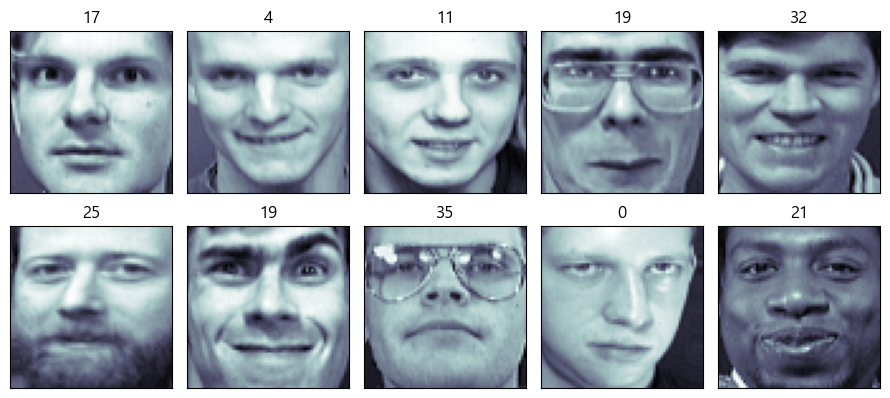

In [183]:
N = 2 
M = 5
np.random.seed(0)
fig = plt.figure(figsize  = (9,5))
plt.subplots_adjust(top = 1, bottom = 0 , hspace = 0 , wspace = 0.05)
klist = np.random.choice(range(len(faces.data)),N*M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N,M, i*M + j + 1)
        ax.imshow(faces.images[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size= 0.4 , random_state= 0)

In [187]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear").fit(X_train,y_train)

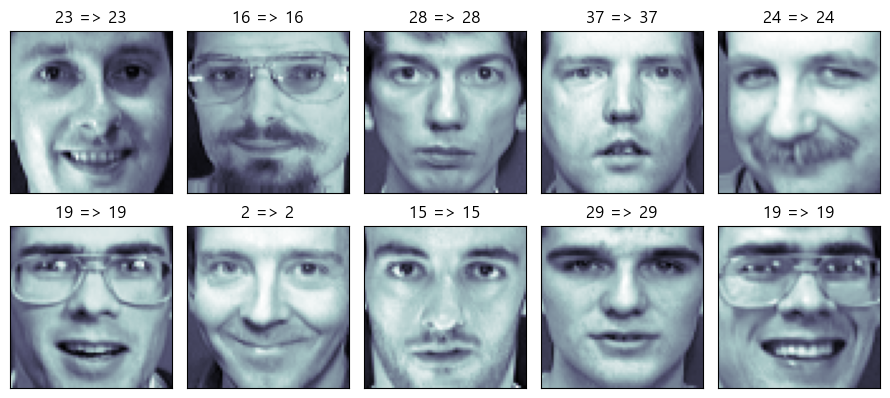

In [192]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize = (9,5))
plt.subplots_adjust(top = 1, bottom = 0 , hspace = 0 , wspace = 0.05)
klist = np.random.choice(range(len(X_test)), N*M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N,M, i*M + j + 1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k],svc.predict(X_test[k: (k +1), :])[0]))
plt.tight_layout()
plt.show()

In [193]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

### SVR

In [199]:
from sklearn.datasets import fetch_openml

boston =fetch_openml(name = 'Boston', version = 1 , as_frame = True)
X = boston.data
y = boston.target

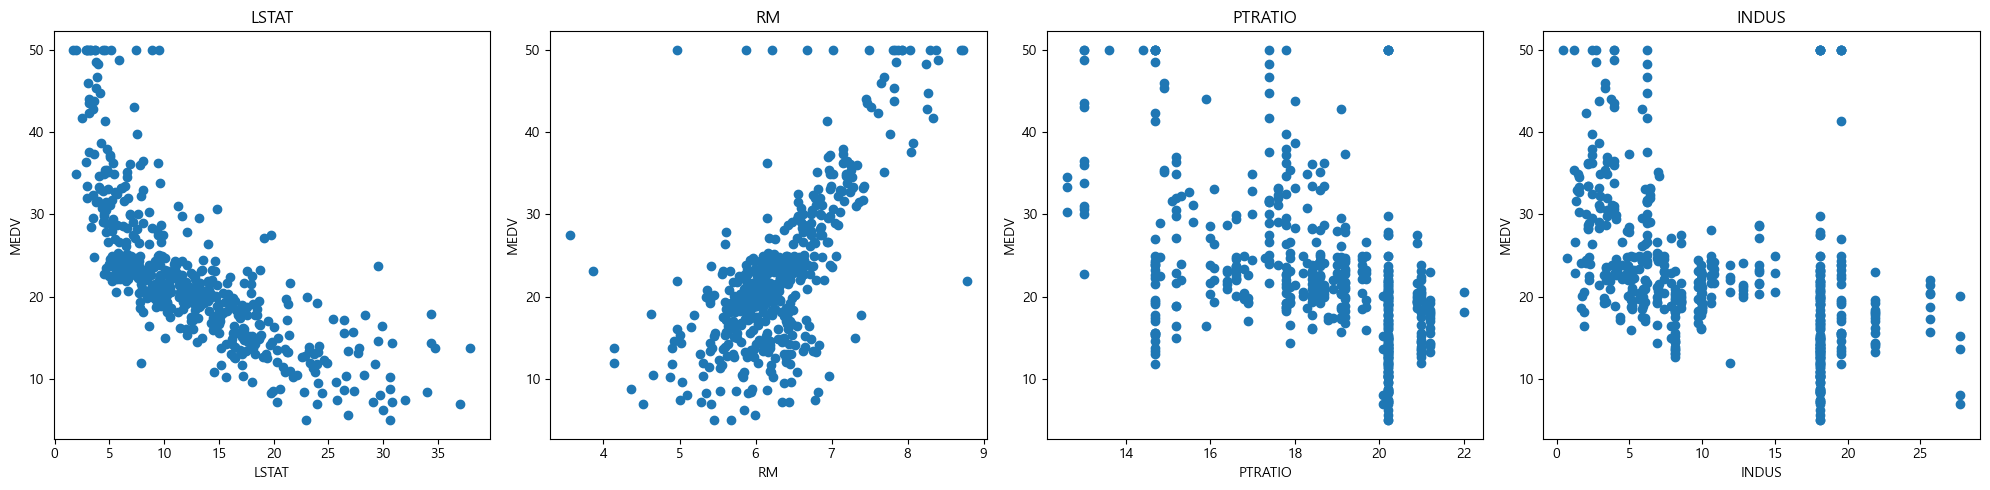

In [200]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# DataFrame 생성
df_boston = pd.concat([X, y], axis=1)

# 그래프 준비
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
target = y

# 변수별 산점도
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df_boston[col]
    plt.scatter(x, target, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("MEDV")

# 그래프 출력
plt.tight_layout()
plt.show()


In [201]:
X = df_boston[["LSTAT"]].copy()
Y = df_boston.iloc[:, -1].values # MEDV

X,Y

(     LSTAT
 0     4.98
 1     9.14
 2     4.03
 3     2.94
 4     5.33
 ..     ...
 501   9.67
 502   9.08
 503   5.64
 504   6.48
 505   7.88
 
 [506 rows x 1 columns],
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 2

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size =0.2, random_state= 5)

In [205]:
from sklearn.svm import SVR

svr_rbf_reg = SVR(kernel="rbf", C = 100)
svr_rbf_reg.fit(X_train, y_train)
print("test data 예측값: \n", svr_rbf_reg.predict(X_test))
print("test data 정확도: \n", svr_rbf_reg.score(X_test,y_test))0000


test data 예측값: 
 [40.99387782 31.65143929 22.08127141  8.92934489 24.68292155 13.30421812
 27.51026542 22.50073441 21.78363984 19.25466526 25.70011328 21.85626122
 21.81688531 23.94463763 22.79156555 20.73749388  8.54864551 20.25939039
 13.25211021 21.79256433 11.31772803 21.54951021 34.70083374 21.74591795
 22.67278082 12.69457565 24.06010885 21.1408235  27.36332662 28.08285793
 13.08993803 12.72127079 17.20421345 16.81106762 22.13610567 21.01121375
 21.89224777 12.80743701 26.5652654  48.53709814 18.42628984  8.58222495
 22.93455553 14.7361577  23.19949423 26.05675577 12.23984516 15.67335724
 19.51046882 12.75647678 19.52016522 20.64981079 22.03712867 13.73634391
 17.78080047 27.04155599 38.15785775 15.49256877 25.4739574  20.11289991
 19.28451864 21.79256433 16.36896783 32.21887557 21.41472405 14.14014797
 20.64235575 23.13243312 21.83224765 21.42715078 15.01210505 26.33811849
 17.35748839 14.13271448 21.08929289 32.6950838  19.18470064 13.09667056
 21.5043811  17.87433573 20.589544